**US Regional Sales Data**

O-Commerce is a fictitious commerce that sell home decor product in US area. As a Data Analyst, after did some exploratory data analysis, we found that there is a stagnant profit of the company in 2020 if we compared to 2018. This discovery could be a serious problem if we didn't solve it soon. To solve the problem, we will use cluster analysis by store location, so we can make the budget is right on target. 


For analysis, we will use this dataset:
https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1109248949

# **1) Data Preparation**

## 1. Import Library and Dataset

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

In [ ]:
# import sales data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1109248949' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

sales = pd.read_csv(sheet_url_trf) #import the data
sales.head() # show the first 5 rows

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Profit,Total Profit
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,"1,963.10","1,001.18",961.92,"4,809.60"
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,"3,939.60","3,348.66",590.94,"1,772.82"
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,"1,775.50",781.22,994.28,994.28
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,"2,324.90","1,464.69",860.21,"6,881.70"
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,"1,822.40","1,476.14",346.26,"2,770.05"


In [ ]:
# import customer data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1618449804' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

customer = pd.read_csv(sheet_url_trf) #import the data
customer.head() # show the first 5 rows

,_CustomerID,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp


In [ ]:
# import store location data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=454059227' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

location = pd.read_csv(sheet_url_trf) #import the data
location.head() # show the first 5 rows

,_StoreID,City Name,County,StateCode,State,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,1,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
1,2,Huntsville,Limestone County/Madison County,AL,Alabama,City,34.69901,-86.67298,256,190582,78554,48775,552604579,3452021,America/Chicago
2,3,Mobile,Mobile County,AL,Alabama,City,30.69436,-88.04305,251,194288,76170,38776,361044263,105325210,America/Chicago
3,4,Montgomery,Montgomery County,AL,Alabama,City,32.36681,-86.29997,334,200602,79866,42927,413985435,4411954,America/Chicago
4,5,Little Rock,Pulaski County,AR,Arkansas,City,34.74648,-92.28959,501,197992,79902,46085,307398785,6758644,America/Chicago


In [ ]:
# import store product data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=493662761' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

product = pd.read_csv(sheet_url_trf) #import the data
product.head() # show the first 5 rows

,_ProductID,Product Name,Product Category
0,1,Cookware,Kitchen
1,2,Photo Frames,Accessories
2,3,Table Lamps,Furniture
3,4,Serveware,Kitchen
4,5,Bathroom Furniture,Furniture


In [ ]:
# import region data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1574360495' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

region = pd.read_csv(sheet_url_trf) #import the data
region.head() # show the first 5 rows

,StateCode,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
# import sales team data

sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=876341812' # copy the sheet link
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') # replace the format for transformation

sales_team = pd.read_csv(sheet_url_trf) #import the data
sales_team.head() # show the first 5 rows

,_SalesTeamID,Sales Team,Region
0,1,Adam Hernandez,Northeast
1,2,Keith Griffin,Northeast
2,3,Jerry Green,West
3,4,Chris Armstrong,Northeast
4,5,Stephen Payne,South


In [ ]:
# copy the dataset
sales_copy = sales.copy()
customer_copy = customer.copy()
location_copy = location.copy()
product_copy = product.copy()
region_copy = region.copy()
sales_team_copy = sales_team.copy()

## 2. Data Cleaning

### a. Check the data type

In [ ]:
# check the data type of sales
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   object 
 15  Unit Cost         7991 non-null   object 
 16  Unit Profit       7991 non-null   object 


In [ ]:
# Change type data
sales_copy['OrderDate'] = pd.to_datetime(sales_copy['OrderDate'])
sales_copy['ShipDate'] = pd.to_datetime(sales_copy['ShipDate'])
sales_copy['ProcuredDate'] = pd.to_datetime(sales_copy['ProcuredDate'])
sales_copy['DeliveryDate'] = pd.to_datetime(sales_copy['DeliveryDate'])
sales_copy['_StoreID'] = sales_copy['_StoreID'].astype(str)
sales_copy['_SalesTeamID'] = sales_copy['_SalesTeamID'].astype(str)
sales_copy['_ProductID'] = sales_copy['_ProductID'].astype(str)
sales_copy['_CustomerID'] = sales_copy['_CustomerID'].astype(str)
sales_copy['Month'] = sales_copy['OrderDate'].dt.strftime('%Y-%m')
sales_copy.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Profit,Total Profit,Month
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,"1,963.10","1,001.18",961.92,"4,809.60",2018-05
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,"3,939.60","3,348.66",590.94,"1,772.82",2018-05
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,"1,775.50",781.22,994.28,994.28,2018-05
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,"2,324.90","1,464.69",860.21,"6,881.70",2018-05
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,"1,822.40","1,476.14",346.26,"2,770.05",2018-05


In [ ]:
#price is still in string and , read as an object, so we need to replace , with blank

sales_copy['Unit Price'] = sales_copy['Unit Price'].str.replace(',','')
sales_copy['Unit Cost'] = sales_copy['Unit Cost'].str.replace(',','')
sales_copy['Unit Profit'] = sales_copy['Unit Profit'].str.replace(',','')
sales_copy['Total Profit'] = sales_copy['Total Profit'].str.replace(',','')

In [ ]:
# convert data type to float
sales_copy[['Unit Price','Unit Cost','Unit Profit','Total Profit']] = sales_copy[['Unit Price','Unit Cost','Unit Profit','Total Profit']].astype(float) 

In [ ]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   object        
 9   _CustomerID       7991 non-null   object        
 10  _StoreID          7991 non-null   object        
 11  _ProductID        7991 non-null   object        
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [ ]:
# check the data type of customer
customer_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _CustomerID     50 non-null     int64 
 1   Customer Names  50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
# change the data type
customer_copy['_CustomerID'] = customer_copy['_CustomerID'].astype(str)

In [ ]:
# check the data type of location
location_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    int64  
 1   City Name         367 non-null    object 
 2   County            367 non-null    object 
 3   StateCode         367 non-null    object 
 4   State             367 non-null    object 
 5   Type              367 non-null    object 
 6   Latitude          367 non-null    float64
 7   Longitude         367 non-null    float64
 8   AreaCode          367 non-null    int64  
 9   Population        367 non-null    int64  
 10  Household Income  367 non-null    int64  
 11  Median Income     367 non-null    int64  
 12  Land Area         367 non-null    int64  
 13  Water Area        367 non-null    int64  
 14  Time Zone         367 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 43.1+ KB


In [ ]:
# Change type data
location_copy['_StoreID'] = location_copy['_StoreID'].astype(str)
location_copy['AreaCode'] = location_copy['AreaCode'].astype(str)

In [ ]:
# check the data type of product
product_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _ProductID        47 non-null     int64 
 1   Product Name      47 non-null     object
 2   Product Category  47 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
# change the data type
product_copy['_ProductID'] = product_copy['_ProductID'].astype(str)

In [ ]:
# check the data type of region
region_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StateCode  48 non-null     object
 1   State      48 non-null     object
 2   Region     48 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [ ]:
# check the data type of sales_team
sales_team_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _SalesTeamID  28 non-null     int64 
 1   Sales Team    28 non-null     object
 2   Region        28 non-null     object
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [ ]:
# change the data type
sales_team_copy['_SalesTeamID'] = sales_team_copy['_SalesTeamID'].astype(str)

### b. Remove Unimportant Column

In [ ]:
sales_copy.drop(['CurrencyCode','WarehouseCode'], axis = 1, inplace = True)

In [ ]:
sales_copy

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Profit,Total Profit,Month
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1963.1,1001.18,961.92,4809.60,2018-05
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3939.6,3348.66,590.94,1772.82,2018-05
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,1775.5,781.22,994.28,994.28,2018-05
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,2324.9,1464.69,860.21,6881.70,2018-05
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1822.4,1476.14,346.26,2770.05,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,2020-09-26,2020-12-30,2021-01-07,2021-01-14,9,41,339,29,1,0.075,234.5,121.94,112.56,112.56,2020-12
7987,SO - 0008088,Online,2020-09-26,2020-12-30,2021-01-02,2021-01-04,14,29,202,3,6,0.050,3202.6,1921.56,1281.04,7686.24,2020-12
7988,SO - 0008089,Online,2020-09-26,2020-12-30,2021-01-23,2021-01-26,14,32,241,35,5,0.200,3825.7,2792.76,1032.94,5164.70,2020-12
7989,SO - 0008090,Online,2020-09-26,2020-12-30,2021-01-20,2021-01-25,20,42,112,36,8,0.100,1072.0,804.00,268.00,2144.00,2020-12


### c. Check Duplicate

In [ ]:
sales_copy.duplicated('OrderNumber').sum()

0

### d. Check Missing Value

In [ ]:
sales_copy.isna().sum()

OrderNumber         0
Sales Channel       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
Unit Profit         0
Total Profit        0
Month               0
dtype: int64

In [ ]:
customer_copy.isna().sum()

_CustomerID       0
Customer Names    0
dtype: int64

In [ ]:
 location_copy.isna().sum()

_StoreID            0
City Name           0
County              0
StateCode           0
State               0
Type                0
Latitude            0
Longitude           0
AreaCode            0
Population          0
Household Income    0
Median Income       0
Land Area           0
Water Area          0
Time Zone           0
dtype: int64

In [ ]:
product_copy.isna().sum()

_ProductID          0
Product Name        0
Product Category    0
dtype: int64

In [ ]:
region_copy.isna().sum()

StateCode    0
State        0
Region       0
dtype: int64

In [ ]:
sales_team_copy.isna().sum()

_SalesTeamID    0
Sales Team      0
Region          0
dtype: int64

### e. Merge Dataset

In [ ]:
# merge sales order with customer to know customer name
df_merged1 = sales_copy.merge(customer_copy, how='inner', left_on =['_CustomerID'], right_on = ['_CustomerID'])
df_merged1.head()

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Profit,Total Profit,Month,Customer Names
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1963.1,1001.18,961.92,4809.60,2018-05,Rochester Ltd
1,SO - 000125,In-Store,2018-04-10,2018-06-02,2018-06-16,2018-06-24,4,15,173,13,1,0.150,268.0,131.32,136.68,136.68,2018-06,Rochester Ltd
2,SO - 000212,In-Store,2017-12-31,2018-06-13,2018-07-05,2018-07-13,7,15,144,8,3,0.100,2217.7,1707.63,510.07,1530.21,2018-06,Rochester Ltd
3,SO - 000268,In-Store,2018-04-10,2018-06-19,2018-07-14,2018-07-17,3,15,178,2,5,0.075,1293.1,659.48,633.62,3168.10,2018-06,Rochester Ltd
4,SO - 000334,In-Store,2018-04-10,2018-06-28,2018-07-10,2018-07-17,10,15,352,18,2,0.150,2586.2,1629.31,956.89,1913.79,2018-06,Rochester Ltd


In [ ]:
# merge df merge 1 with location to know the location
df_merged2 = df_merged1.merge(location_copy, how='inner', left_on =['_StoreID'], right_on = ['_StoreID'])
df_merged2.head()

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,...,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
1,SO - 0003926,Online,2019-05-15,2019-08-24,2019-09-13,2019-09-21,15,20,259,9,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
2,SO - 0006713,In-Store,2020-03-10,2020-07-21,2020-08-15,2020-08-16,6,48,259,6,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
3,SO - 0003168,In-Store,2019-02-04,2019-05-25,2019-06-12,2019-06-14,4,21,259,35,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
4,SO - 000236,Distributor,2018-04-10,2018-06-15,2018-07-13,2018-07-20,21,11,259,26,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York


In [ ]:
# merge df merge 2 with product to know the product name
df_merged3 = df_merged2.merge(product_copy, how='inner', left_on =['_ProductID'], right_on = ['_ProductID'])
df_merged3.head()

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,...,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone,Product Name,Product Category
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,Furniture
1,SO - 0005919,Wholesale,2020-03-10,2020-04-21,2020-04-28,2020-05-07,28,14,178,12,...,-87.94458,847,155286,59425,73977,92979678,317743,America/Chicago,Dining Furniture,Furniture
2,SO - 0004469,Distributor,2019-08-23,2019-11-02,2019-11-29,2019-12-03,24,48,352,12,...,-76.34522,757,136454,52940,49190,133308913,219591352,America/New York,Dining Furniture,Furniture
3,SO - 0003805,In-Store,2019-05-15,2019-08-10,2019-08-21,2019-08-22,2,27,277,12,...,-73.89875,914,201116,73073,59049,46651457,5916223,America/New York,Dining Furniture,Furniture
4,SO - 000244,Online,2018-04-10,2018-06-17,2018-07-14,2018-07-24,19,21,77,12,...,-120.43572,805,105093,27365,50433,59005328,1648788,America/Los Angeles,Dining Furniture,Furniture


In [ ]:
# merge df merge 3 with region to know the region
df_merged4 = df_merged3.merge(region_copy, how='inner', left_on =['State'], right_on = ['State'])
df_merged4.head()

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,...,Population,Household Income,Median Income,Land Area,Water Area,Time Zone,Product Name,Product Category,StateCode_y,Region
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,...,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,Furniture,NY,Northeast
1,SO - 0003805,In-Store,2019-05-15,2019-08-10,2019-08-21,2019-08-22,2,27,277,12,...,201116,73073,59049,46651457,5916223,America/New York,Dining Furniture,Furniture,NY,Northeast
2,SO - 0003209,Online,2019-02-04,2019-05-29,2019-06-03,2019-06-08,15,21,258,12,...,125109,49558,68294,137777476,1003270,America/New York,Dining Furniture,Furniture,NY,Northeast
3,SO - 0002984,Online,2019-02-04,2019-05-04,2019-05-11,2019-05-20,19,27,276,12,...,1455444,523690,34299,110000000,40000000,America/New York,Dining Furniture,Furniture,NY,Northeast
4,SO - 0007746,Online,2020-09-26,2020-11-18,2020-12-10,2020-12-15,18,2,260,12,...,489278,161116,87040,671934794,704749682,America/New York,Dining Furniture,Furniture,NY,Northeast


In [ ]:
# merge df merge 4 with sales_team to know the sales_team
df_merged5 = df_merged4.merge(sales_team_copy, how='inner', left_on =['_SalesTeamID'], right_on = ['_SalesTeamID'])
df_merged5.head()

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,...,Median Income,Land Area,Water Area,Time Zone,Product Name,Product Category,StateCode_y,Region_x,Sales Team,Region_y
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,...,80327,135481314,160302131,America/New York,Dining Furniture,Furniture,NY,Northeast,Joshua Bennett,Northeast
1,SO - 0005166,In-Store,2019-08-23,2020-01-22,2020-01-28,2020-01-31,6,7,262,12,...,31918,104592941,31362925,America/New York,Dining Furniture,Furniture,NY,Northeast,Joshua Bennett,Northeast
2,SO - 0006713,In-Store,2020-03-10,2020-07-21,2020-08-15,2020-08-16,6,48,259,6,...,80327,135481314,160302131,America/New York,Computers,Electronic,NY,Northeast,Joshua Bennett,Northeast
3,SO - 0006843,In-Store,2020-03-10,2020-08-06,2020-08-14,2020-08-17,6,32,274,18,...,55039,152000000,110000000,America/New York,Basketball,Hobbies,NY,Northeast,Joshua Bennett,Northeast
4,SO - 0005035,In-Store,2019-08-23,2020-01-08,2020-01-15,2020-01-21,6,47,259,1,...,80327,135481314,160302131,America/New York,Cookware,Kitchen,NY,Northeast,Joshua Bennett,Northeast


In [ ]:
# copy the merge dataset
df_merge = df_merged5.copy()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   ProcuredDate      7991 non-null   datetime64[ns]
 3   OrderDate         7991 non-null   datetime64[ns]
 4   ShipDate          7991 non-null   datetime64[ns]
 5   DeliveryDate      7991 non-null   datetime64[ns]
 6   _SalesTeamID      7991 non-null   object        
 7   _CustomerID       7991 non-null   object        
 8   _StoreID          7991 non-null   object        
 9   _ProductID        7991 non-null   object        
 10  Order Quantity    7991 non-null   int64         
 11  Discount Applied  7991 non-null   float64       
 12  Unit Price        7991 non-null   float64       
 13  Unit Cost         7991 non-null   float64       
 14  Unit Profit       7991 n

In [ ]:
# Remove unnecessary data
df_merge.drop(['_SalesTeamID','Sales Team','Region_y','_CustomerID','Customer Names','ProcuredDate','ShipDate','DeliveryDate','StateCode_y'], axis = 1, inplace = True) 

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   _StoreID          7991 non-null   object        
 4   _ProductID        7991 non-null   object        
 5   Order Quantity    7991 non-null   int64         
 6   Discount Applied  7991 non-null   float64       
 7   Unit Price        7991 non-null   float64       
 8   Unit Cost         7991 non-null   float64       
 9   Unit Profit       7991 non-null   float64       
 10  Total Profit      7991 non-null   float64       
 11  Month             7991 non-null   object        
 12  City Name         7991 non-null   object        
 13  County            7991 non-null   object        
 14  StateCode_x       7991 n

In [ ]:
df_merge.drop(['Month'], axis = 1, inplace = True) 

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   _StoreID          7991 non-null   object        
 4   _ProductID        7991 non-null   object        
 5   Order Quantity    7991 non-null   int64         
 6   Discount Applied  7991 non-null   float64       
 7   Unit Price        7991 non-null   float64       
 8   Unit Cost         7991 non-null   float64       
 9   Unit Profit       7991 non-null   float64       
 10  Total Profit      7991 non-null   float64       
 11  City Name         7991 non-null   object        
 12  County            7991 non-null   object        
 13  StateCode_x       7991 non-null   object        
 14  State             7991 n

In [ ]:
# rename the column with _x 
df_merge.rename(columns={'StateCode_x': 'StateCode', 'Region_x': 'Region'}, inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   _StoreID          7991 non-null   object        
 4   _ProductID        7991 non-null   object        
 5   Order Quantity    7991 non-null   int64         
 6   Discount Applied  7991 non-null   float64       
 7   Unit Price        7991 non-null   float64       
 8   Unit Cost         7991 non-null   float64       
 9   Unit Profit       7991 non-null   float64       
 10  Total Profit      7991 non-null   float64       
 11  City Name         7991 non-null   object        
 12  County            7991 non-null   object        
 13  StateCode         7991 non-null   object        
 14  State             7991 n

In [ ]:
# Export df_merge data that already grouped to CSV
df_merge.to_csv('Merged Dataset.csv', index=False)

## 3. Group by Store

After analyzed with SQL for Cohort Analysis, we found that our customer retention is good. Hence, we will do the cluster analysis by store.

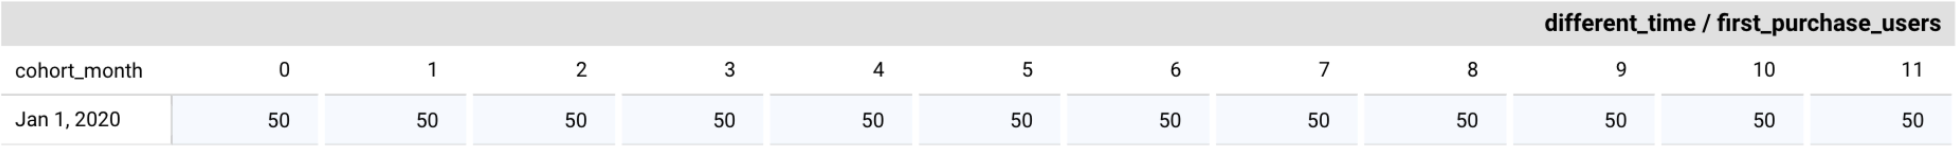

### a. Store

In [ ]:
# copy the dataset of merged data
df_merge1 = df_merge.copy()
df_merge1

,OrderNumber,Sales Channel,OrderDate,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Unit Profit,...,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone,Product Name,Product Category,Region
0,SO - 000101,In-Store,2018-05-31,259,12,5,0.075,1963.1,1001.18,961.92,...,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,Furniture,Northeast
1,SO - 0005166,In-Store,2020-01-22,262,12,5,0.050,1909.5,954.75,954.75,...,716,258071,110549,31918,104592941,31362925,America/New York,Dining Furniture,Furniture,Northeast
2,SO - 0006713,In-Store,2020-07-21,259,6,3,0.075,2492.4,1246.20,1246.20,...,631,213776,68789,80327,135481314,160302131,America/New York,Computers,Electronic,Northeast
3,SO - 0006843,In-Store,2020-08-06,274,18,3,0.100,3932.9,2084.44,1848.46,...,718,474558,156341,55039,152000000,110000000,America/New York,Basketball,Hobbies,Northeast
4,SO - 0005035,In-Store,2020-01-08,259,1,3,0.150,1755.4,1299.00,456.40,...,631,213776,68789,80327,135481314,160302131,America/New York,Cookware,Kitchen,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0006605,Online,2020-07-10,367,4,5,0.100,2706.8,1786.49,920.31,...,414,600155,230807,35958,249128870,1720458,America/Chicago,Serveware,Kitchen,Midwest
7987,SO - 0002504,Online,2019-03-08,365,19,3,0.150,1976.5,790.60,1185.90,...,920,105207,42308,42826,117673093,27054147,America/Chicago,Vanities,Furniture,Midwest
7988,SO - 0001226,Distributor,2018-10-12,367,33,7,0.400,2505.8,2079.81,425.99,...,414,600155,230807,35958,249128870,1720458,America/Chicago,Outdoor Decor,Hobbies,Midwest
7989,SO - 0004190,Online,2019-09-28,146,40,6,0.050,3946.3,2249.39,1696.91,...,808,352769,127177,61442,156812572,20481895,Pacific/Honolulu,Rugs,Accessories,West


In [ ]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   _StoreID          7991 non-null   object        
 4   _ProductID        7991 non-null   object        
 5   Order Quantity    7991 non-null   int64         
 6   Discount Applied  7991 non-null   float64       
 7   Unit Price        7991 non-null   float64       
 8   Unit Cost         7991 non-null   float64       
 9   Unit Profit       7991 non-null   float64       
 10  Total Profit      7991 non-null   float64       
 11  City Name         7991 non-null   object        
 12  County            7991 non-null   object        
 13  StateCode         7991 non-null   object        
 14  State             7991 n

In [ ]:
# change the data type of storeID to integer to make it sort ascending in new dataframe
df_merge1['_StoreID'] = df_merge1['_StoreID'].astype(int)
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   OrderDate         7991 non-null   datetime64[ns]
 3   _StoreID          7991 non-null   int64         
 4   _ProductID        7991 non-null   object        
 5   Order Quantity    7991 non-null   int64         
 6   Discount Applied  7991 non-null   float64       
 7   Unit Price        7991 non-null   float64       
 8   Unit Cost         7991 non-null   float64       
 9   Unit Profit       7991 non-null   float64       
 10  Total Profit      7991 non-null   float64       
 11  City Name         7991 non-null   object        
 12  County            7991 non-null   object        
 13  StateCode         7991 non-null   object        
 14  State             7991 n

In [ ]:
# group by store
store = df_merge1.groupby(['_StoreID','State','Region','City Name','County','Type']).agg({
    'Order Quantity': 'sum',
    'Unit Price': 'mean', 
    'Unit Cost': 'mean', 
    'Unit Profit': 'mean', 
    'Total Profit': 'sum', 
    'Population': 'median', 
    'Household Income': 'sum', 
    'Median Income': 'sum',
    'OrderNumber': 'count'
})

In [ ]:
store

,,,,,,Order Quantity,Unit Price,Unit Cost,Unit Profit,Total Profit,Population,Household Income,Median Income,OrderNumber
_StoreID,State,Region,City Name,County,Type,,,,,,,,,
1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,102719.30,212461.0,2429244,838647,27
2,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,71529.61,190582.0,1806742,1121825,23
3,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,47198.88,194288.0,914040,465312,12
4,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,52003.21,200602.0,1357722,729759,17
5,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,47056.79,197992.0,1198530,691275,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,78029.30,207948.0,1422468,936756,18
364,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,117487.18,172860.0,1859676,1417528,28
365,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,49599.30,105207.0,719236,728042,17


In [ ]:
# to reset the index as a dataframe

store = store.reset_index()
store

,_StoreID,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost,Unit Profit,Total Profit,Population,Household Income,Median Income,OrderNumber
0,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,102719.30,212461.0,2429244,838647,27
1,2,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,71529.61,190582.0,1806742,1121825,23
2,3,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,47198.88,194288.0,914040,465312,12
3,4,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,52003.21,200602.0,1357722,729759,17
4,5,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,47056.79,197992.0,1198530,691275,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,78029.30,207948.0,1422468,936756,18
363,364,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,117487.18,172860.0,1859676,1417528,28
364,365,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,49599.30,105207.0,719236,728042,17
365,366,Wisconsin,Midwest,Madison,Dane County,City,109,2639.337931,1530.077586,1109.261034,112801.16,248951.0,3018523,1591984,29


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    int64  
 1   State             367 non-null    object 
 2   Region            367 non-null    object 
 3   City Name         367 non-null    object 
 4   County            367 non-null    object 
 5   Type              367 non-null    object 
 6   Order Quantity    367 non-null    int64  
 7   Unit Price        367 non-null    float64
 8   Unit Cost         367 non-null    float64
 9   Unit Profit       367 non-null    float64
 10  Total Profit      367 non-null    float64
 11  Population        367 non-null    float64
 12  Household Income  367 non-null    int64  
 13  Median Income     367 non-null    int64  
 14  OrderNumber       367 non-null    int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 43.1+ KB


In [ ]:
# convert storeID to str
store['_StoreID'] = store['_StoreID'].astype(str)

In [ ]:
# Export store data that already grouped to CSV
store.to_csv('groupby_store.csv', index=False)

Next, we will use **store** data that has already grouped to analyze the cluster with K-Means.

### b. Combine with Profit per Sales Channel Dataset

We will combine the store data above with profit per sales channel to understand the profit per sales channel in each _StoreID. Before combine the data here, we've made the pivot table in sheet, then we join the data with store data.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1394433455'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
saleschannel = pd.read_csv(sheet_url_trf)
saleschannel.head()

,_StoreID,Distributor,In-Store,Online,Wholesale
0,1,8101.506,69378.500,22612.902,2626.400
1,2,6445.065,39537.638,23215.299,2331.600
2,3,7919.534,35396.301,333.660,3549.392
3,4,2931.116,34698.429,14373.644,NaN
4,5,6017.404,9812.351,17457.051,13769.974


In [ ]:
saleschannel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _StoreID     367 non-null    int64  
 1   Distributor  354 non-null    float64
 2   In-Store     367 non-null    float64
 3   Online       366 non-null    float64
 4   Wholesale    333 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.5 KB


In [ ]:
# convert storeID to str
saleschannel['_StoreID'] = saleschannel['_StoreID'].astype(str)

In [ ]:
# merge saleschannel and store
store1 = store.merge(saleschannel, how='inner', left_on =['_StoreID'], right_on = ['_StoreID'])
store1

,_StoreID,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost,Unit Profit,Total Profit,Population,Household Income,Median Income,OrderNumber,Distributor,In-Store,Online,Wholesale
0,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,102719.30,212461.0,2429244,838647,27,8101.506,69378.500,22612.902,2626.400
1,2,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,71529.61,190582.0,1806742,1121825,23,6445.065,39537.638,23215.299,2331.600
2,3,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,47198.88,194288.0,914040,465312,12,7919.534,35396.301,333.660,3549.392
3,4,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,52003.21,200602.0,1357722,729759,17,2931.116,34698.429,14373.644,NaN
4,5,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,47056.79,197992.0,1198530,691275,15,6017.404,9812.351,17457.051,13769.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,78029.30,207948.0,1422468,936756,18,11064.246,26119.481,36809.465,4036.080
363,364,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,117487.18,172860.0,1859676,1417528,28,6016.466,39642.493,40165.495,31662.726
364,365,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,49599.30,105207.0,719236,728042,17,12378.585,17563.715,16987.716,2669.280
365,366,Wisconsin,Midwest,Madison,Dane County,City,109,2639.337931,1530.077586,1109.261034,112801.16,248951.0,3018523,1591984,29,19608.555,57578.929,10930.045,24683.604


In [ ]:
store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    object 
 1   State             367 non-null    object 
 2   Region            367 non-null    object 
 3   City Name         367 non-null    object 
 4   County            367 non-null    object 
 5   Type              367 non-null    object 
 6   Order Quantity    367 non-null    int64  
 7   Unit Price        367 non-null    float64
 8   Unit Cost         367 non-null    float64
 9   Unit Profit       367 non-null    float64
 10  Total Profit      367 non-null    float64
 11  Population        367 non-null    float64
 12  Household Income  367 non-null    int64  
 13  Median Income     367 non-null    int64  
 14  OrderNumber       367 non-null    int64  
 15  Distributor       354 non-null    float64
 16  In-Store          367 non-null    float64
 1

### c. Combine with Profit per Region Dataset

We will combine the above data with profit per region to understand the profit per region in each _StoreID. Before combine the data here, we've made the pivot table in sheet, then we join the data with store data.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=1764743052'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
region_profit = pd.read_csv(sheet_url_trf)
region_profit.head()

,_StoreID,Midwest,Northeast,South,West
0,1,NaN,NaN,102719.30,NaN
1,2,NaN,NaN,71529.61,NaN
2,3,NaN,NaN,47198.88,NaN
3,4,NaN,NaN,52003.21,NaN
4,5,NaN,NaN,47056.79,NaN


In [ ]:
region_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _StoreID   367 non-null    int64  
 1   Midwest    78 non-null     float64
 2   Northeast  46 non-null     float64
 3   South      116 non-null    float64
 4   West       127 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.5 KB


In [ ]:
# convert storeID to str
region_profit['_StoreID'] = region_profit['_StoreID'].astype(str)

In [ ]:
# merge store1 and region
store2 = store1.merge(region_profit, how='inner', left_on =['_StoreID'], right_on = ['_StoreID'])
store2

,_StoreID,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost,Unit Profit,...,Median Income,OrderNumber,Distributor,In-Store,Online,Wholesale,Midwest,Northeast,South,West
0,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,...,838647,27,8101.506,69378.500,22612.902,2626.400,NaN,NaN,102719.30,NaN
1,2,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,...,1121825,23,6445.065,39537.638,23215.299,2331.600,NaN,NaN,71529.61,NaN
2,3,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,...,465312,12,7919.534,35396.301,333.660,3549.392,NaN,NaN,47198.88,NaN
3,4,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,...,729759,17,2931.116,34698.429,14373.644,NaN,NaN,NaN,52003.21,NaN
4,5,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,...,691275,15,6017.404,9812.351,17457.051,13769.974,NaN,NaN,47056.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,...,936756,18,11064.246,26119.481,36809.465,4036.080,NaN,NaN,NaN,78029.30
363,364,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,...,1417528,28,6016.466,39642.493,40165.495,31662.726,NaN,NaN,NaN,117487.18
364,365,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,...,728042,17,12378.585,17563.715,16987.716,2669.280,49599.30,NaN,NaN,NaN
365,366,Wisconsin,Midwest,Madison,Dane County,City,109,2639.337931,1530.077586,1109.261034,...,1591984,29,19608.555,57578.929,10930.045,24683.604,112801.16,NaN,NaN,NaN


In [ ]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    object 
 1   State             367 non-null    object 
 2   Region            367 non-null    object 
 3   City Name         367 non-null    object 
 4   County            367 non-null    object 
 5   Type              367 non-null    object 
 6   Order Quantity    367 non-null    int64  
 7   Unit Price        367 non-null    float64
 8   Unit Cost         367 non-null    float64
 9   Unit Profit       367 non-null    float64
 10  Total Profit      367 non-null    float64
 11  Population        367 non-null    float64
 12  Household Income  367 non-null    int64  
 13  Median Income     367 non-null    int64  
 14  OrderNumber       367 non-null    int64  
 15  Distributor       354 non-null    float64
 16  In-Store          367 non-null    float64
 1

### d. Combine with Profit per Product Category Dataset

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1cMZ7OSDl1BW9k_8cXEC1uKczAmX1lxEb5YR57lK168A/edit#gid=496929833'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
product_category = pd.read_csv(sheet_url_trf)
product_category.head()

,_StoreID,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,1,65274.61,13572.93,10307.48,6758.16,6806.12
1,2,9241.71,10014.83,26480.35,4947.68,20845.04
2,3,22217.27,6263.96,7395.19,964.80,10357.66
3,4,12427.64,14106.98,4652.22,2875.10,17941.27
4,5,18325.64,9482.38,13236.06,201.00,5811.71


In [ ]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _StoreID     367 non-null    int64  
 1   Accessories  367 non-null    float64
 2   Electronic   317 non-null    float64
 3   Furniture    363 non-null    float64
 4   Hobbies      308 non-null    float64
 5   Kitchen      362 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.3 KB


In [ ]:
# convert storeID to str
product_category['_StoreID'] = product_category['_StoreID'].astype(str)

In [ ]:
# merge store2 and product category
store3 = store2.merge(product_category, how='inner', left_on =['_StoreID'], right_on = ['_StoreID'])
store3

,_StoreID,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost,Unit Profit,...,Wholesale,Midwest,Northeast,South,West,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,...,2626.400,NaN,NaN,102719.30,NaN,65274.61,13572.93,10307.48,6758.16,6806.12
1,2,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,...,2331.600,NaN,NaN,71529.61,NaN,9241.71,10014.83,26480.35,4947.68,20845.04
2,3,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,...,3549.392,NaN,NaN,47198.88,NaN,22217.27,6263.96,7395.19,964.80,10357.66
3,4,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,...,NaN,NaN,NaN,52003.21,NaN,12427.64,14106.98,4652.22,2875.10,17941.27
4,5,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,...,13769.974,NaN,NaN,47056.79,NaN,18325.64,9482.38,13236.06,201.00,5811.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,...,4036.080,NaN,NaN,NaN,78029.30,7571.54,24882.20,15989.69,24661.77,4924.10
363,364,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,...,31662.726,NaN,NaN,NaN,117487.18,38506.91,2514.91,21711.55,46405.94,8347.87
364,365,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,...,2669.280,49599.30,NaN,NaN,NaN,8510.01,7305.14,7984.60,24513.15,1286.40
365,366,Wisconsin,Midwest,Madison,Dane County,City,109,2639.337931,1530.077586,1109.261034,...,24683.604,112801.16,NaN,NaN,NaN,46209.17,31518.61,12202.99,409.91,22460.48


In [ ]:
store3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    object 
 1   State             367 non-null    object 
 2   Region            367 non-null    object 
 3   City Name         367 non-null    object 
 4   County            367 non-null    object 
 5   Type              367 non-null    object 
 6   Order Quantity    367 non-null    int64  
 7   Unit Price        367 non-null    float64
 8   Unit Cost         367 non-null    float64
 9   Unit Profit       367 non-null    float64
 10  Total Profit      367 non-null    float64
 11  Population        367 non-null    float64
 12  Household Income  367 non-null    int64  
 13  Median Income     367 non-null    int64  
 14  OrderNumber       367 non-null    int64  
 15  Distributor       354 non-null    float64
 16  In-Store          367 non-null    float64
 1

### e. Handle Outlier
Since we will analysis with K-Means, we must ensure the outlier doesn't ruin our analysis. For cluster analysis, we will use Total Profit and Unit Cost as our variables.

In [ ]:
df_outliers = store3.copy()

<Axes: >

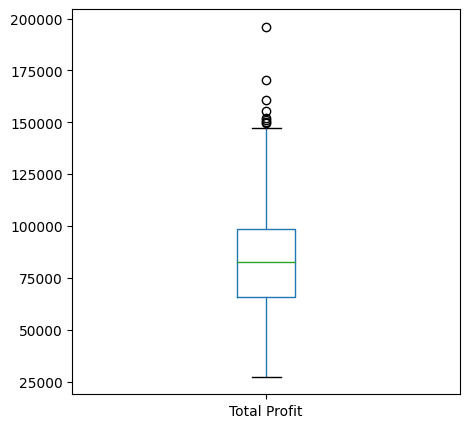

In [ ]:
df_outliers.boxplot(column=['Total Profit'], fontsize=10, rot=0, grid=False, figsize=(5,5), vert=True)

<Axes: >

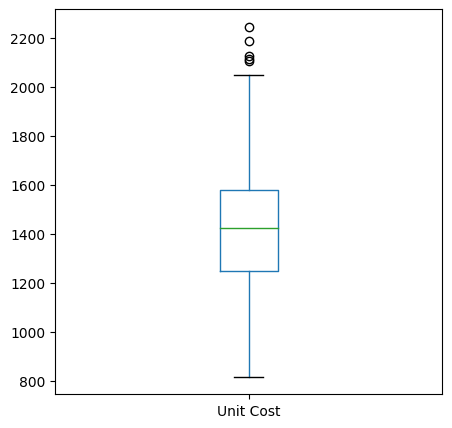

In [ ]:
df_outliers.boxplot(column=['Unit Cost'], fontsize=10, rot=0, grid=False, figsize=(5,5), vert=True)

From the boxplot above, we choose to ignore the outlier because that values might be matter for analysis. 

# **2) Cluster Analysis**

After preparing the data, we will continue to cluster analysis. For this analysis, we will use K-Means so we must ensure there are no outlier in our data that can ruin our K-Means. 

## 1. Scaler

In [ ]:
# IMPORT LIBRARY FOR CLUSTERING
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to scalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
cluster_store = store3[['_StoreID','Total Profit','Unit Cost']]
cluster_store

,_StoreID,Total Profit,Unit Cost
0,1,102719.30,1423.377778
1,2,71529.61,1325.671304
2,3,47198.88,1247.279167
3,4,52003.21,1450.778824
4,5,47056.79,1005.523333
...,...,...,...
362,363,78029.30,1805.103889
363,364,117487.18,1334.020714
364,365,49599.30,1383.132941
365,366,112801.16,1530.077586


In [ ]:
# Define Minmax Scale dataset
mm_scale_df = cluster_store.copy()
column = cluster_store.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['Total Profit', 'Unit Cost']] = mm_scaler.fit_transform(mm_scale_df[['Total Profit', 'Unit Cost']])

In [ ]:
mm_scale_df[['Total Profit', 'Unit Cost']].head()

,Total Profit,Unit Cost
0,0.446707,0.425029
1,0.261806,0.356586
2,0.117568,0.301673
3,0.146049,0.444223
4,0.116725,0.132324


<Axes: xlabel='Total Profit', ylabel='Unit Cost'>

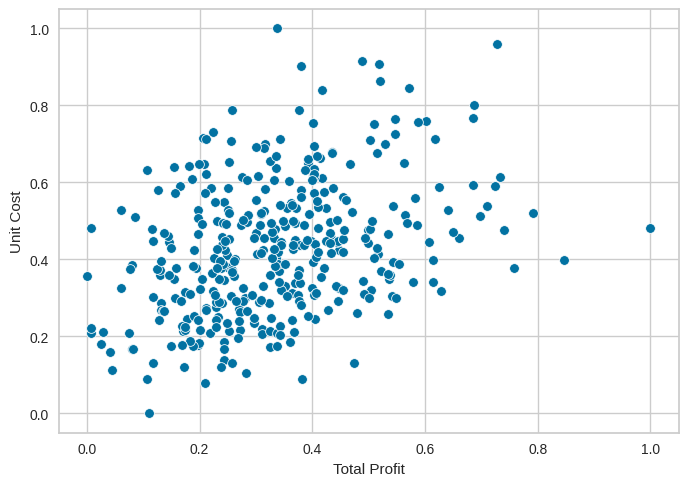

In [ ]:
sns.scatterplot (data = mm_scale_df, x='Total Profit', y='Unit Cost')

For K-Means, we must standardize our data. We choose MinMax Scaler because we have no many outliers and we want our outliers are still be noticed.

## 2. K-Means Clustering

We will use elbow method and silhoutte analysis to decide the number of clusters.

### a. Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

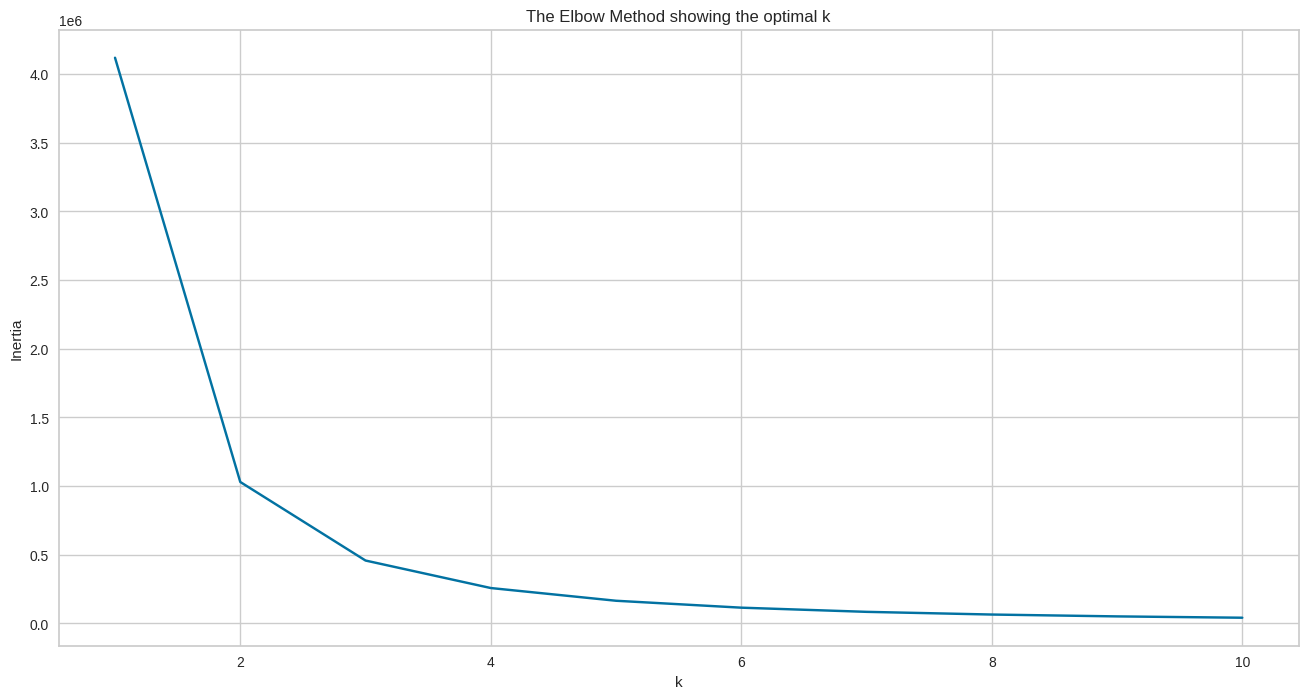

[4119228.2141373577, 1029822.2113831721, 457764.14837277925, 257505.12935435615, 164854.5422448173, 114486.54866349924, 84103.95824732231, 64477.43879286079, 50962.54769317912, 41293.293071584136]


In [ ]:
# K-Means Clustering with elbow method
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(mm_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Based on our subjectivity, the elbow shown in 3-4. Hence, we will use silhouette analysis to see which number is the best cluster.

### b. Silhoutte Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.37761987633646676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.37028437365936473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.351519745556337


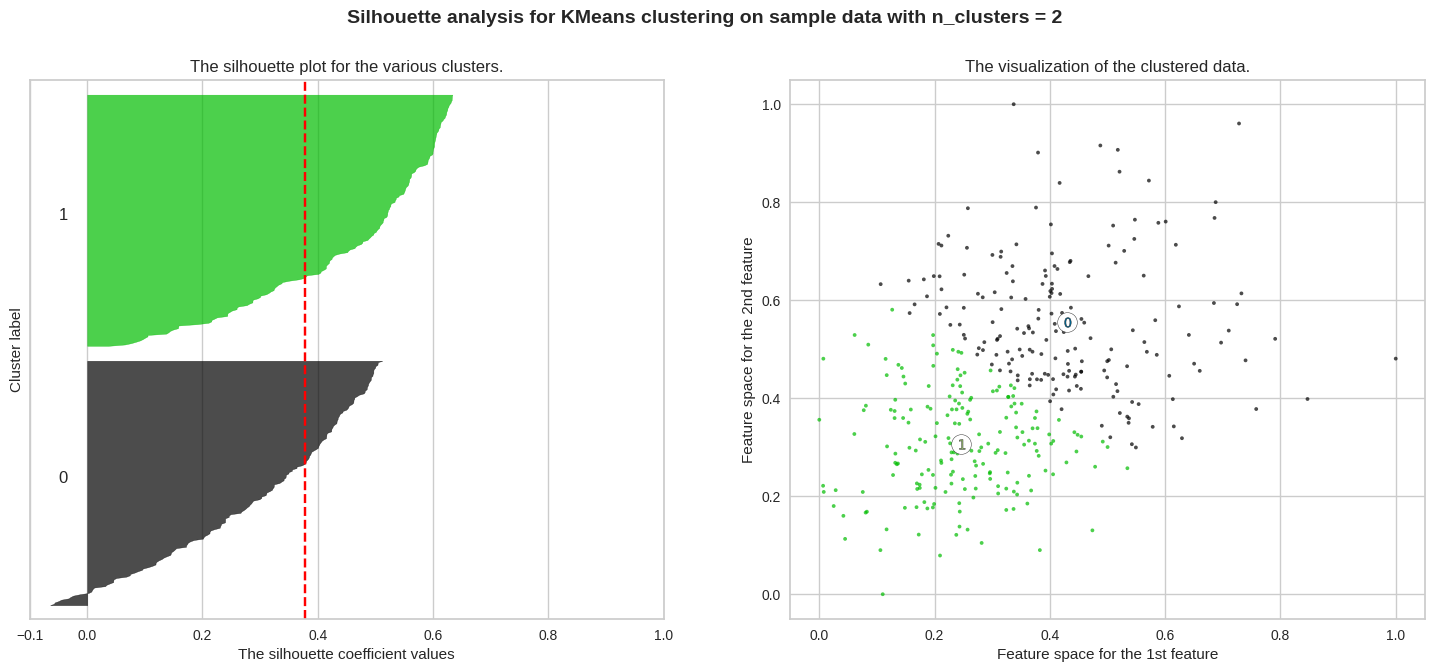

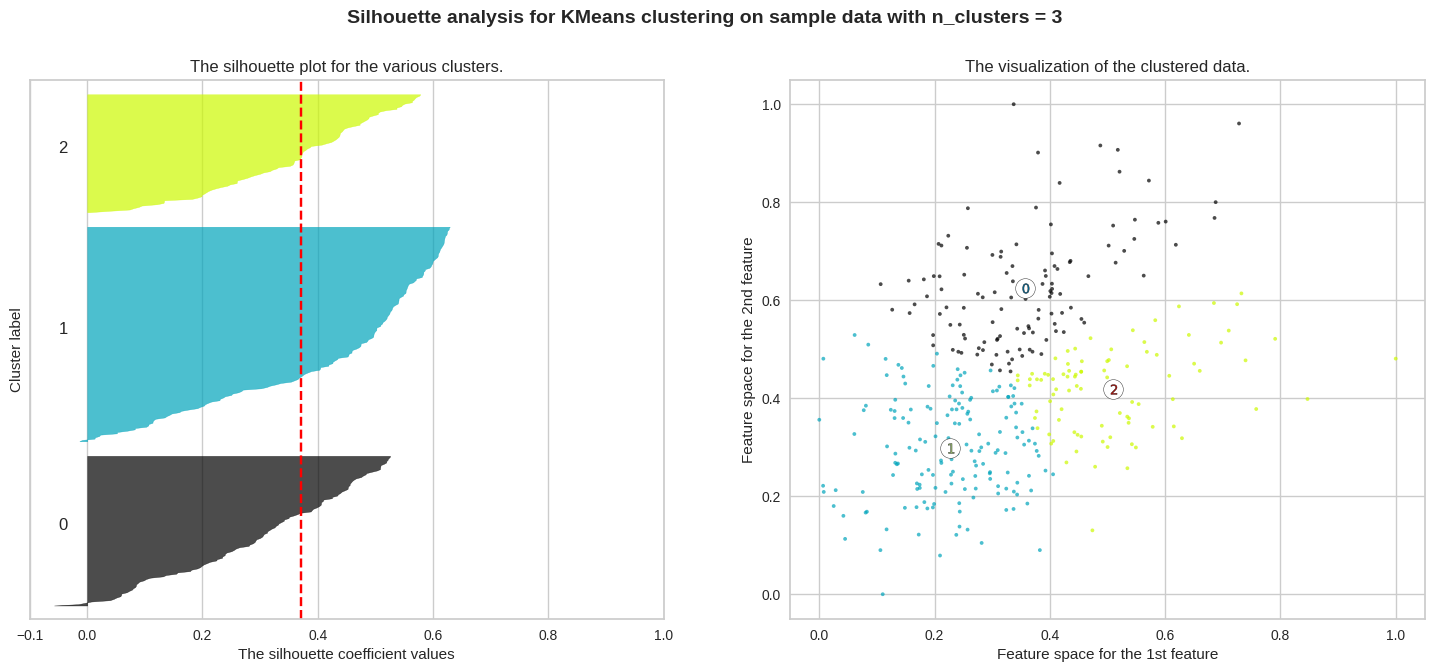

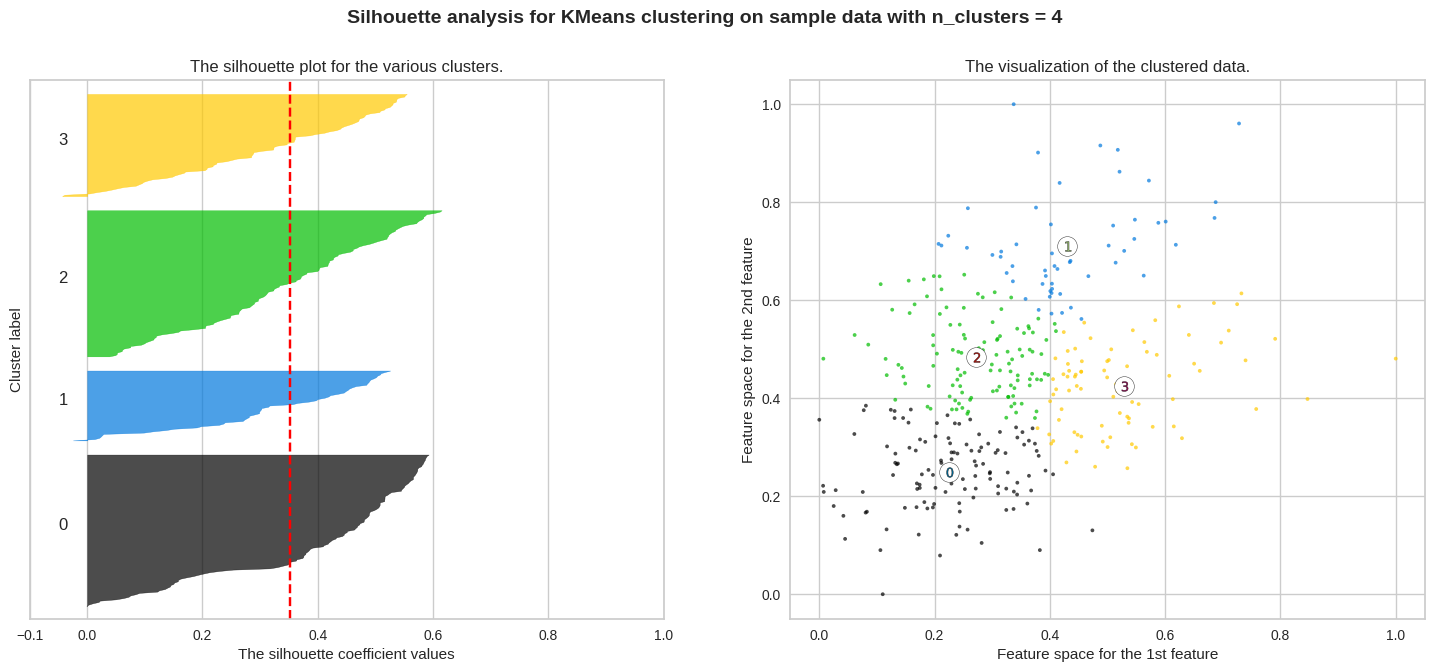

In [ ]:
silhoutte_analysis(mm_scale_df[['Total Profit', 'Unit Cost']],list(range(2,5)))

3 shown the highest number after 2. If we also check from visualization above, 3 shows a similar form rather than 4. Then, as for business purposes, we choose our cluster as 3 cluster to make it more segmented. 

## 3. Segmentation

In [ ]:
# make cluster
Cluster_3 = mm_scale_df.copy()
cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_3[['Total Profit', 'Unit Cost']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,_StoreID,Total Profit,Unit Cost,cluster
0,1,0.446707,0.425029,1
1,2,0.261806,0.356586,0
2,3,0.117568,0.301673,0
3,4,0.146049,0.444223,0
4,5,0.116725,0.132324,0


<Axes: xlabel='cluster', ylabel='Total Profit'>

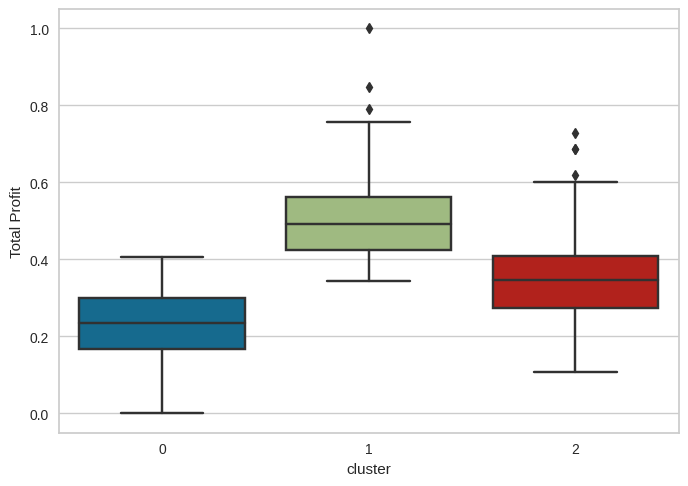

In [ ]:
# Distribution of Total Profit
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='Total Profit')

<Axes: xlabel='cluster', ylabel='Unit Cost'>

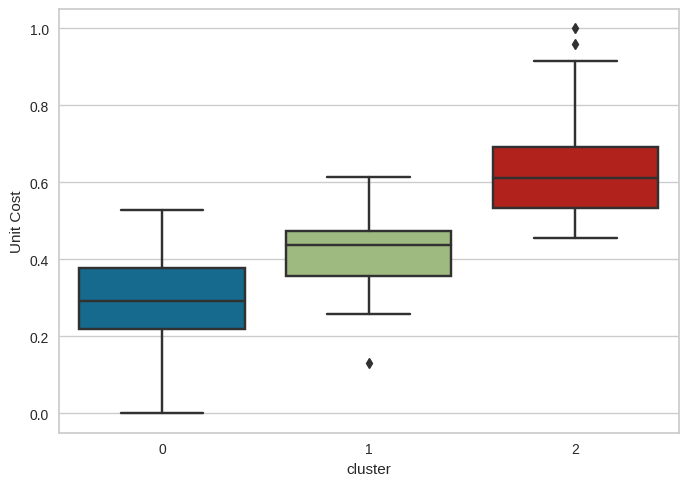

In [ ]:
# Distribution of Unit Cost
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='Unit Cost')

## 4. Merge Cluster with Dataset

In [ ]:
# Merge to Main Data
store_data = Cluster_3.merge(store3,how= 'inner', on = '_StoreID')
store_data

,_StoreID,Total Profit_x,Unit Cost_x,cluster,State,Region,City Name,County,Type,Order Quantity,...,Wholesale,Midwest,Northeast,South,West,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,1,0.446707,0.425029,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,...,2626.400,NaN,NaN,102719.30,NaN,65274.61,13572.93,10307.48,6758.16,6806.12
1,2,0.261806,0.356586,0,Alabama,South,Huntsville,Limestone County/Madison County,City,93,...,2331.600,NaN,NaN,71529.61,NaN,9241.71,10014.83,26480.35,4947.68,20845.04
2,3,0.117568,0.301673,0,Alabama,South,Mobile,Mobile County,City,45,...,3549.392,NaN,NaN,47198.88,NaN,22217.27,6263.96,7395.19,964.80,10357.66
3,4,0.146049,0.444223,0,Alabama,South,Montgomery,Montgomery County,City,68,...,NaN,NaN,NaN,52003.21,NaN,12427.64,14106.98,4652.22,2875.10,17941.27
4,5,0.116725,0.132324,0,Arkansas,South,Little Rock,Pulaski County,City,74,...,13769.974,NaN,NaN,47056.79,NaN,18325.64,9482.38,13236.06,201.00,5811.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,0.300338,0.692426,2,Washington,West,Tacoma,Pierce County,City,83,...,4036.080,NaN,NaN,NaN,78029.30,7571.54,24882.20,15989.69,24661.77,4924.10
363,364,0.534255,0.362435,1,Washington,West,Vancouver,Clark County,City,117,...,31662.726,NaN,NaN,NaN,117487.18,38506.91,2514.91,21711.55,46405.94,8347.87
364,365,0.131798,0.396838,0,Wisconsin,Midwest,Green Bay,Brown County,City,63,...,2669.280,49599.30,NaN,NaN,NaN,8510.01,7305.14,7984.60,24513.15,1286.40
365,366,0.506475,0.499772,1,Wisconsin,Midwest,Madison,Dane County,City,109,...,24683.604,112801.16,NaN,NaN,NaN,46209.17,31518.61,12202.99,409.91,22460.48


## 5. Visualize the Cluster

<Axes: xlabel='Total Profit_y', ylabel='Unit Cost_y'>

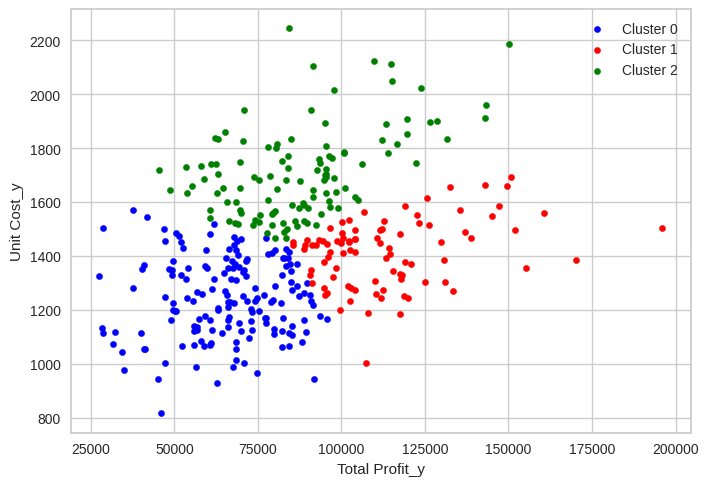

In [ ]:
# Make scatter plot based on cluster then mix it in one figure
ax = store_data[store_data['cluster'] == 0].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='blue', label='Cluster 0')
ax = store_data[store_data['cluster'] == 1].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='red', label='Cluster 1', ax=ax)
ax = store_data[store_data['cluster'] == 2].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='green', label='Cluster 2', ax=ax)
ax

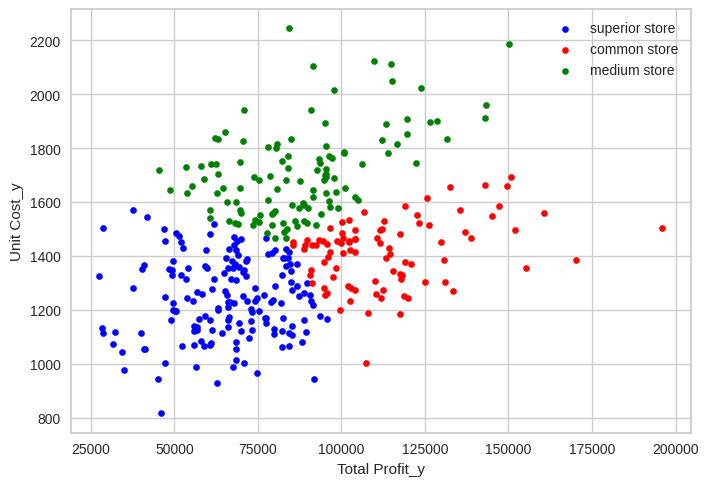

In [ ]:
cluster_scatter = store_data[store_data['cluster'] == 0].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='blue', label='superior store')
cluster_scatter = store_data[store_data['cluster'] == 1].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='red', label='common store', ax = cluster_scatter)
cluster_scatter = store_data[store_data['cluster'] == 2].plot.scatter(x='Total Profit_y', y='Unit Cost_y', c='green', label='medium store', ax = cluster_scatter)

## 6. Cluster Interpretation

In [ ]:
pd.set_option('display.max_columns',None)
store_data.head()

,_StoreID,Total Profit_x,Unit Cost_x,cluster,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost_y,Unit Profit,Total Profit_y,Population,Household Income,Median Income,OrderNumber,Distributor,In-Store,Online,Wholesale,Midwest,Northeast,South,West,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,1,0.446707,0.425029,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,102719.30,212461.0,2429244,838647,27,8101.506,69378.500,22612.902,2626.400,NaN,NaN,102719.30,NaN,65274.61,13572.93,10307.48,6758.16,6806.12
1,2,0.261806,0.356586,0,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,71529.61,190582.0,1806742,1121825,23,6445.065,39537.638,23215.299,2331.600,NaN,NaN,71529.61,NaN,9241.71,10014.83,26480.35,4947.68,20845.04
2,3,0.117568,0.301673,0,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,47198.88,194288.0,914040,465312,12,7919.534,35396.301,333.660,3549.392,NaN,NaN,47198.88,NaN,22217.27,6263.96,7395.19,964.80,10357.66
3,4,0.146049,0.444223,0,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,52003.21,200602.0,1357722,729759,17,2931.116,34698.429,14373.644,NaN,NaN,NaN,52003.21,NaN,12427.64,14106.98,4652.22,2875.10,17941.27
4,5,0.116725,0.132324,0,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,47056.79,197992.0,1198530,691275,15,6017.404,9812.351,17457.051,13769.974,NaN,NaN,47056.79,NaN,18325.64,9482.38,13236.06,201.00,5811.71


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _StoreID          367 non-null    object 
 1   Total Profit_x    367 non-null    float64
 2   Unit Cost_x       367 non-null    float64
 3   cluster           367 non-null    int32  
 4   State             367 non-null    object 
 5   Region            367 non-null    object 
 6   City Name         367 non-null    object 
 7   County            367 non-null    object 
 8   Type              367 non-null    object 
 9   Order Quantity    367 non-null    int64  
 10  Unit Price        367 non-null    float64
 11  Unit Cost_y       367 non-null    float64
 12  Unit Profit       367 non-null    float64
 13  Total Profit_y    367 non-null    float64
 14  Population        367 non-null    float64
 15  Household Income  367 non-null    int64  
 16  Median Income     367 non-null    int64  
 1

In [ ]:
# Export to CSV
store_data.to_csv('Cluster.csv', index=False)

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Total Profit_y'].sum()

,cluster,Total Profit_y
0,0,10697146.75
1,1,10210867.80
2,2,9966662.35


Based on total profit: 0 > 1 > 2

In [ ]:
store_data.groupby(['cluster'], as_index = False)['_StoreID'].count()

,cluster,_StoreID
0,0,163
1,1,90
2,2,114


Based on the number of storeID: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['OrderNumber'].sum()

,cluster,OrderNumber
0,0,3292
1,1,2318
2,2,2381


Based on total order: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Unit Price'].mean()

,cluster,Unit Price
0,0,1996.597766
1,1,2317.891682
2,2,2662.516141


Based on average of unit price: 2 > 1 > 0

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Order Quantity'].sum()

,cluster,Order Quantity
0,0,14546
1,1,11041
2,2,10575


Based on total order quantity: 0 > 1 > 2

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Unit Cost_y'].mean()

,cluster,Unit Cost_y
0,0,1242.357174
1,1,1414.336751
2,2,1709.229051


Based on average of unit cost: 2 > 1 > 0

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Population'].mean()

,cluster,Population
0,0,296911.846626
1,1,256918.633333
2,2,337359.350877


Based on average of population: 2 > 0 > 1

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Household Income'].median()

,cluster,Household Income
0,0,1204605.0
1,1,1407359.0
2,2,1133282.0


Based on median of household income: 1 > 0 > 2

In [ ]:
store_data.groupby(['cluster',], as_index = False)['Median Income'].median()

,cluster,Median Income
0,0,959888.0
1,1,1333833.5
2,2,1077446.5


Based on median of income: 1 > 2 > 0

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Distributor'].sum()

,cluster,Distributor
0,0,1931772.743
1,1,1891319.081
2,2,1705568.281


Based on total profit in distributor sales channel: 0 > 1 > 2

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Distributor'].count()

,cluster,Distributor
0,0,157
1,1,87
2,2,110


Based on total store in distributor sales channel: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['In-Store'].sum()

,cluster,In-Store
0,0,4423899.249
1,1,4104392.128
2,2,4206777.843


Based on total profit in In-Store sales channel: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['In-Store'].count()

,cluster,In-Store
0,0,163
1,1,90
2,2,114


Based on total store in In-Store sales channel: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Online'].sum()

,cluster,Online
0,0,3238263.631
1,1,3009611.793
2,2,2850142.078


Based on total profit in Online sales channel: 0 > 1 > 2

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Online'].count()

,cluster,Online
0,0,163
1,1,90
2,2,113


Based on total store in Online sales channel: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Wholesale'].sum()

,cluster,Wholesale
0,0,1103209.940
1,1,1205543.998
2,2,1204173.245


Based on total profit in Wholesale sales channel: 1 > 2 > 0

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Wholesale'].count()

,cluster,Wholesale
0,0,140
1,1,87
2,2,106


Based on total store in Wholesale sales channel: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Midwest'].sum()

,cluster,Midwest
0,0,2561657.07
1,1,1735571.11
2,2,2281068.73


Based on total profit in Midwest region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Midwest'].count()

,cluster,Midwest
0,0,37
1,1,15
2,2,26


Based on total store in Midwest region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Northeast'].sum()

,cluster,Northeast
0,0,1322946.53
1,1,966909.05
2,2,1291632.63


Based on total profit in Northeast region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Northeast'].count()

,cluster,Northeast
0,0,21
1,1,9
2,2,16


Based on total store in Northeast region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['South'].sum()

,cluster,South
0,0,3944549.71
1,1,3044887.00
2,2,2804500.38


Based on total profit in South region: 0 > 1 > 2

In [ ]:
store_data.groupby(['cluster'], as_index = False)['South'].count()

,cluster,South
0,0,59
1,1,26
2,2,31


Based on total store in Midwest region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['West'].sum()

,cluster,West
0,0,2867993.44
1,1,4463500.64
2,2,3589460.61


Based on total profit in Midwest region: 1 > 2 > 0

In [ ]:
store_data.groupby(['cluster'], as_index = False)['West'].count()

,cluster,West
0,0,46
1,1,40
2,2,41


Based on total store in Midwest region: 0 > 2 > 1

In [ ]:
store_data.groupby(['cluster'], as_index = False)['Accessories','Electronic','Furniture','Hobbies','Kitchen'].sum()

<ipython-input-113-75d1807b97cb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_data.groupby(['cluster'], as_index = False)['Accessories','Electronic','Furniture','Hobbies','Kitchen'].sum()


,cluster,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,0,4522362.58,931994.09,2656263.80,882629.39,1703896.89
1,1,4478770.23,769014.91,2150133.80,831362.37,1981586.49
2,2,4354109.35,711006.05,2232311.13,859711.56,1809524.26


Based on product category:
- Accessories: 0 > 1 > 2
- Electronic: 0 > 1 > 2
- Furniture: 0 > 2 > 1
- Hobbies: 0 > 2 > 1
- Kitchen: 1 > 2 > 0

Based on cluster:
- Cluster 0: Accessories > Furniture > Kitchen > Electronic > Hobbies
- Cluster 1: Accessories > Furniture > Kitchen > Hobbies > Electronic
- Cluster 2: Accessories > Furniture > Kitchen > Hobbies > Electronic

# **3) Further Analysis**

After we have our segmentation, we can use forecast as our next analysis to predict the profit. 

## 1. Monthly Profit

In [ ]:
df_merge['Order Month'] =  df_merge['OrderDate'].dt.to_period('M').dt.to_timestamp()

In [ ]:
df_merge[['OrderDate','Order Month']]

,OrderDate,Order Month
0,2018-05-31,2018-05-01
1,2020-01-22,2020-01-01
2,2020-07-21,2020-07-01
3,2020-08-06,2020-08-01
4,2020-01-08,2020-01-01
...,...,...
7986,2020-07-10,2020-07-01
7987,2019-03-08,2019-03-01
7988,2018-10-12,2018-10-01
7989,2019-09-28,2019-09-01


In [ ]:
df_monthly_sales = df_merge.groupby(['Order Month'], as_index = False).agg({'Total Profit': 'sum'})
df_monthly_sales.head()

,Order Month,Total Profit
0,2018-05-01,24264.46
1,2018-06-01,903955.57
2,2018-07-01,1013208.16
3,2018-08-01,1076989.96
4,2018-09-01,1038803.00


Text(0, 0.5, 'Profit')

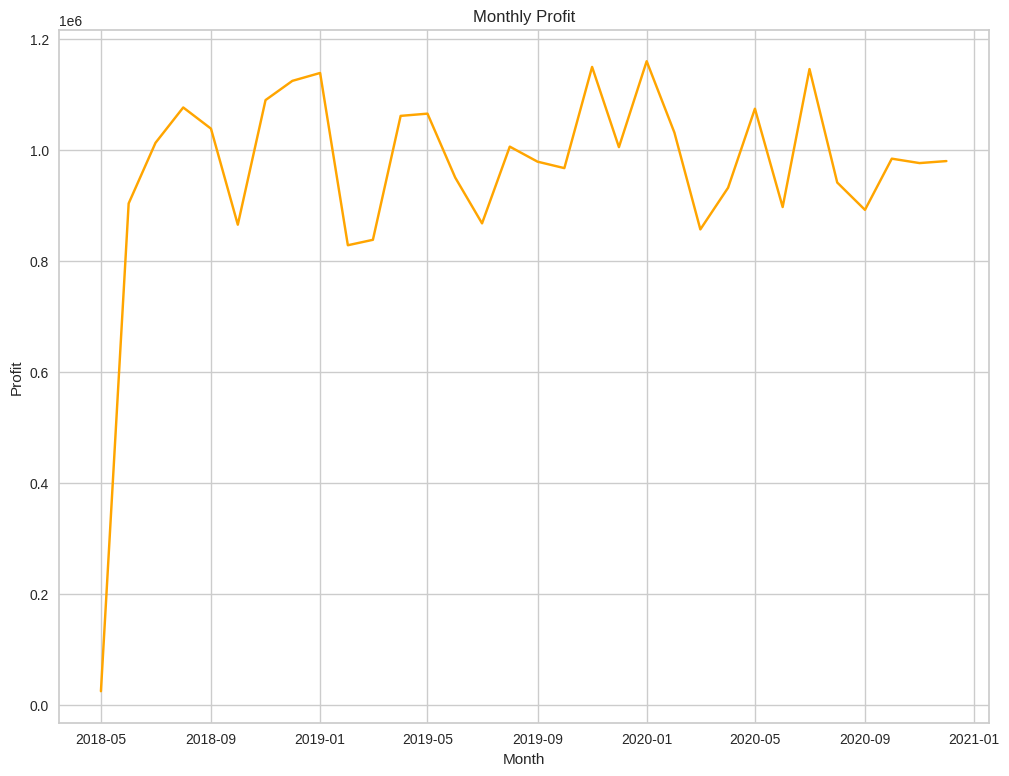

In [ ]:
plt.figure(figsize = (12,9))
sns.lineplot(data = df_monthly_sales, x = 'Order Month', y ='Total Profit', color='orange')
plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Profit')

## 2. Prediction of Profit in 2021

In [ ]:
#Import Library
from prophet import Prophet

In [ ]:
#Make a daily income table
df_forecast = df_merge.groupby(['OrderDate'],as_index = False).agg({'Total Profit':'sum'})

In [ ]:
df_forecast.head()

,OrderDate,Total Profit
0,2018-05-31,24264.46
1,2018-06-01,55358.76
2,2018-06-02,28088.82
3,2018-06-03,88691.39
4,2018-06-04,32645.21


There are provisions for naming variables to use the FBProphet algorithm, namely:

- The variable X, in other words Order Date should be named ds.
- Variable Y, in other words Profit per Order should be named y.

In [ ]:
#Change the name
df_forecast = df_forecast.rename(columns = {'OrderDate':'ds','Total Profit':'y'})

In [ ]:
#Defines a predictive model
wizard = Prophet()
#Using a model to predict df forecast data
wizard.fit(df_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwr273l6/r92l88cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwr273l6/hawadxeh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84405', 'data', 'file=/tmp/tmpnwr273l6/r92l88cv.json', 'init=/tmp/tmpnwr273l6/hawadxeh.json', 'output', 'file=/tmp/tmpnwr273l6/prophet_modelt6h5w7f0/prophet_model-20230529091258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Generate year-ahead timestamps from the df_forecast dataset
future = wizard.make_future_dataframe(periods=365)
future.tail()

,ds
1305,2021-12-26
1306,2021-12-27
1307,2021-12-28
1308,2021-12-29
1309,2021-12-30


In [ ]:
#Predicting income for the next year
forecast_result = wizard.predict(future)

In [ ]:
#Create a Month-Year column for each prediction result
forecast_result['ds month'] = forecast_result['ds'].dt.to_period('M').dt.to_timestamp()

In [ ]:
#Results of Prediction of Monthly Income for the Next Year
forgr = forecast_result.groupby(['ds month'], as_index = False).agg({'trend':'sum'})

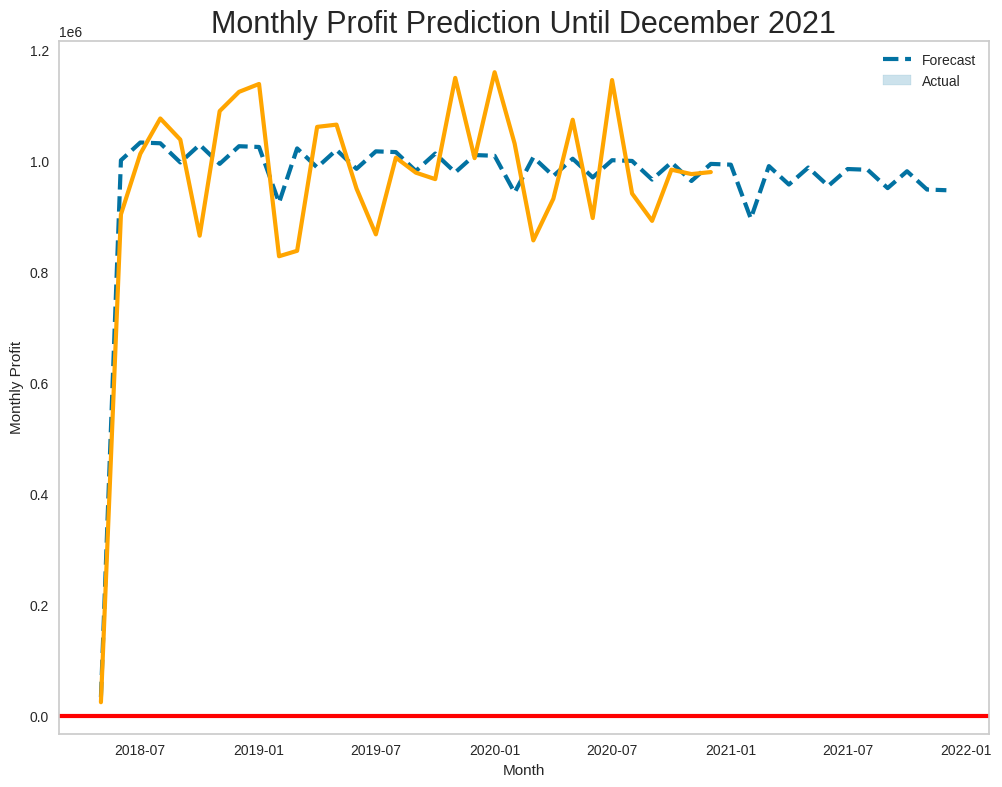

In [ ]:
#Graph of monthly income comparison with predictions
plt.figure(figsize=(12,9))
sns.lineplot(data = forgr, x = 'ds month', y = 'trend', linestyle = '--', linewidth = 3)
sns.lineplot(data = df_monthly_sales, x = 'Order Month', y ='Total Profit', linewidth = 3, color='orange')
plt.title('Monthly Profit Prediction Until December 2021',size=22)
plt.axhline(0 , color='red', linewidth = 3)
plt.xlabel('Month')
plt.ylabel('Monthly Profit')
plt.legend(['Forecast','Actual'])
plt.grid(False)

**From that forecasting above, the profit of this US sales will stagnant. We need segmentation to boost our profit.**

## 3. Monthly Total Orders

In [ ]:
#Table of many monthly orders
df_num_orders = df_merge.groupby(['Order Month'],as_index = False).agg({'OrderNumber':'nunique'})
df_num_orders. head()

,Order Month,OrderNumber
0,2018-05-01,8
1,2018-06-01,252
2,2018-07-01,261
3,2018-08-01,279
4,2018-09-01,254


Text(0, 0.5, 'Number of Order')

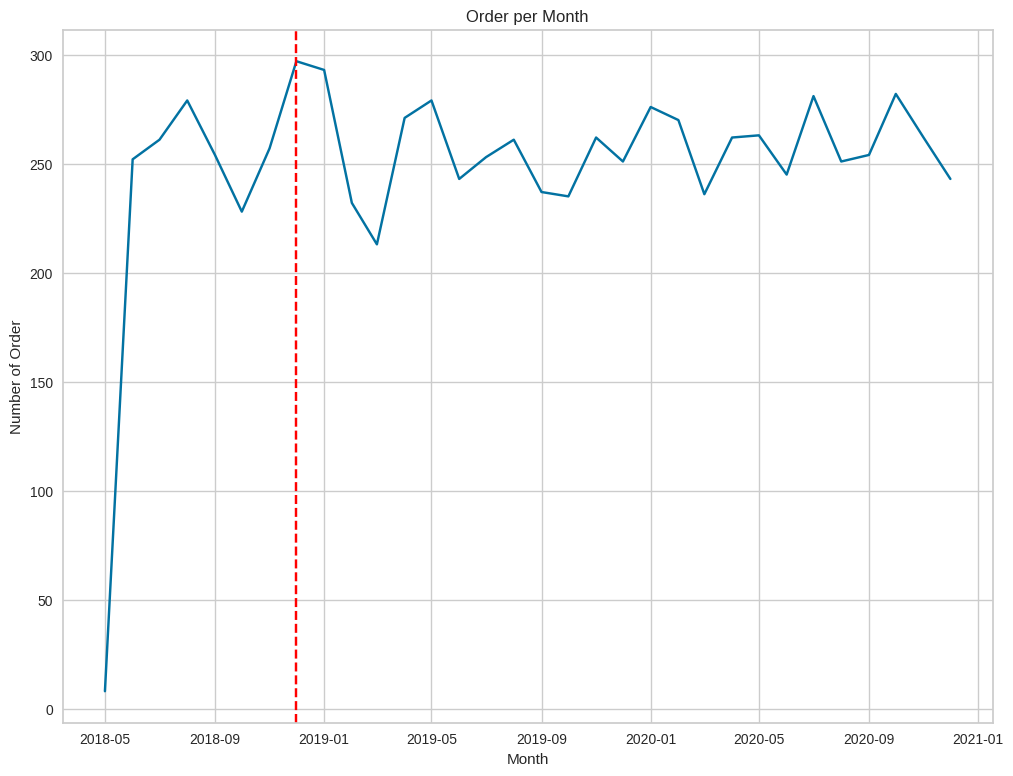

In [ ]:
#Graph of Number of Orders per Month
plt.figure(figsize = (12,9))
sns.lineplot(data = df_num_orders, x = 'Order Month', y ='OrderNumber')
plt.axvline(datetime(2018,12,1),color='red',linestyle='dashed')
plt.title('Order per Month')
plt.xlabel('Month')
plt.ylabel('Number of Order')

Peaked number of order happened in the end of 2018 (December).

## 4. Monthly AOV Trend

In [ ]:
#Monthly AOV table
df_aov = df_merge.groupby(['Order Month'],as_index = False).agg({'Total Profit':'sum','OrderNumber':'nunique'})

#Create an AOV column
df_aov['AOV'] = df_aov['Total Profit']/df_aov['OrderNumber']
df_aov.head()

,Order Month,Total Profit,OrderNumber,AOV
0,2018-05-01,24264.46,8,3033.057500
1,2018-06-01,903955.57,252,3587.125278
2,2018-07-01,1013208.16,261,3882.023602
3,2018-08-01,1076989.96,279,3860.179068
4,2018-09-01,1038803.00,254,4089.775591


Text(0, 0.5, 'AOV')

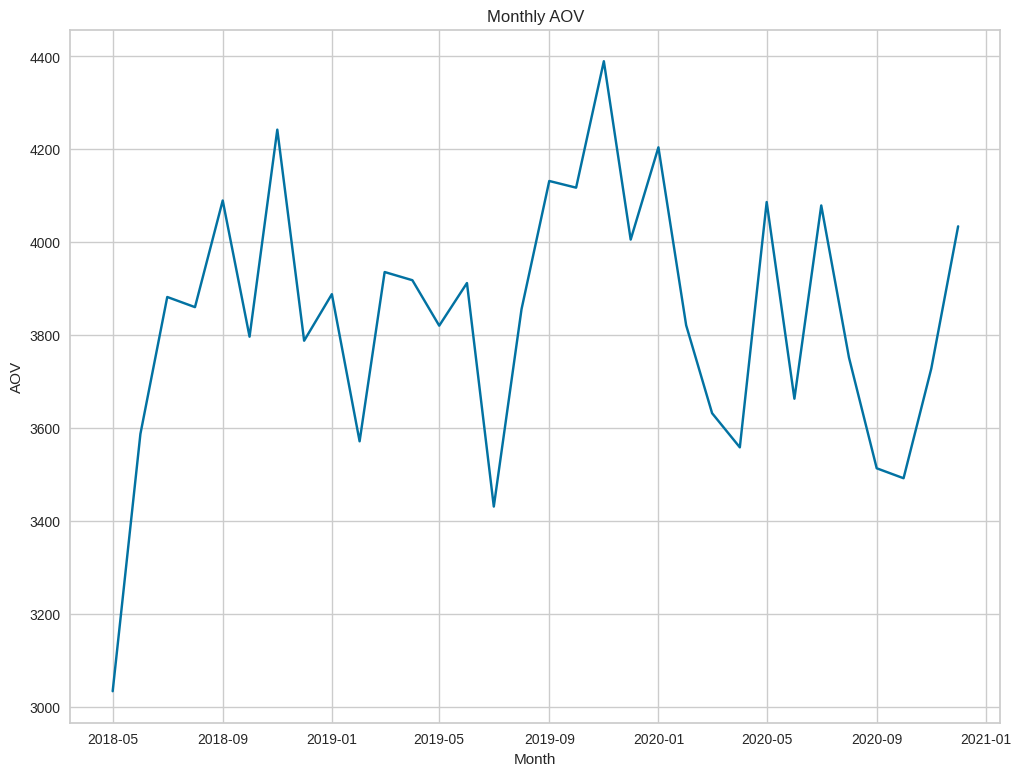

In [ ]:
#Monthly AOV chart
plt.figure(figsize = (12,9))
sns.lineplot(data = df_aov, x = 'Order Month', y ='AOV')
plt.title('Monthly AOV')
plt.xlabel('Month')
plt.ylabel('AOV')

## 5. AOV per Cluster

In [ ]:
store_data

,_StoreID,Total Profit_x,Unit Cost_x,cluster,State,Region,City Name,County,Type,Order Quantity,Unit Price,Unit Cost_y,Unit Profit,Total Profit_y,Population,Household Income,Median Income,OrderNumber,Distributor,In-Store,Online,Wholesale,Midwest,Northeast,South,West,Accessories,Electronic,Furniture,Hobbies,Kitchen
0,1,0.446707,0.425029,1,Alabama,South,Birmingham,Shelby County/Jefferson County,City,122,2217.203704,1423.377778,793.826667,102719.30,212461.0,2429244,838647,27,8101.506,69378.500,22612.902,2626.400,NaN,NaN,102719.30,NaN,65274.61,13572.93,10307.48,6758.16,6806.12
1,2,0.261806,0.356586,0,Alabama,South,Huntsville,Limestone County/Madison County,City,93,2112.247826,1325.671304,786.576522,71529.61,190582.0,1806742,1121825,23,6445.065,39537.638,23215.299,2331.600,NaN,NaN,71529.61,NaN,9241.71,10014.83,26480.35,4947.68,20845.04
2,3,0.117568,0.301673,0,Alabama,South,Mobile,Mobile County,City,45,2126.133333,1247.279167,878.855833,47198.88,194288.0,914040,465312,12,7919.534,35396.301,333.660,3549.392,NaN,NaN,47198.88,NaN,22217.27,6263.96,7395.19,964.80,10357.66
3,4,0.146049,0.444223,0,Alabama,South,Montgomery,Montgomery County,City,68,2244.500000,1450.778824,793.722353,52003.21,200602.0,1357722,729759,17,2931.116,34698.429,14373.644,NaN,NaN,NaN,52003.21,NaN,12427.64,14106.98,4652.22,2875.10,17941.27
4,5,0.116725,0.132324,0,Arkansas,South,Little Rock,Pulaski County,City,74,1750.040000,1005.523333,744.519333,47056.79,197992.0,1198530,691275,15,6017.404,9812.351,17457.051,13769.974,NaN,NaN,47056.79,NaN,18325.64,9482.38,13236.06,201.00,5811.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,363,0.300338,0.692426,2,Washington,West,Tacoma,Pierce County,City,83,2700.844444,1805.103889,895.741111,78029.30,207948.0,1422468,936756,18,11064.246,26119.481,36809.465,4036.080,NaN,NaN,NaN,78029.30,7571.54,24882.20,15989.69,24661.77,4924.10
363,364,0.534255,0.362435,1,Washington,West,Vancouver,Clark County,City,117,2187.550000,1334.020714,853.530714,117487.18,172860.0,1859676,1417528,28,6016.466,39642.493,40165.495,31662.726,NaN,NaN,NaN,117487.18,38506.91,2514.91,21711.55,46405.94,8347.87
364,365,0.131798,0.396838,0,Wisconsin,Midwest,Green Bay,Brown County,City,63,2323.717647,1383.132941,940.585882,49599.30,105207.0,719236,728042,17,12378.585,17563.715,16987.716,2669.280,49599.30,NaN,NaN,NaN,8510.01,7305.14,7984.60,24513.15,1286.40
365,366,0.506475,0.499772,1,Wisconsin,Midwest,Madison,Dane County,City,109,2639.337931,1530.077586,1109.261034,112801.16,248951.0,3018523,1591984,29,19608.555,57578.929,10930.045,24683.604,112801.16,NaN,NaN,NaN,46209.17,31518.61,12202.99,409.91,22460.48


In [ ]:
df_aov1 = store_data.groupby(['cluster'],as_index = False).agg({'Total Profit_y':'sum','OrderNumber':'sum'})
df_aov1

,cluster,Total Profit_y,OrderNumber
0,0,10697146.75,3292
1,1,10210867.80,2318
2,2,9966662.35,2381


In [ ]:
#Create an AOV column
df_aov1['AOV'] = df_aov1['Total Profit_y']/df_aov1['OrderNumber']
df_aov1.head()

,cluster,Total Profit_y,OrderNumber,AOV
0,0,10697146.75,3292,3249.437044
1,1,10210867.80,2318,4405.033563
2,2,9966662.35,2381,4185.914469


Based on AOV: 1 > 2 > 0